In [71]:
import pandas as pd
import numpy as np
from random import randint
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Make Random dataset.

Source: http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

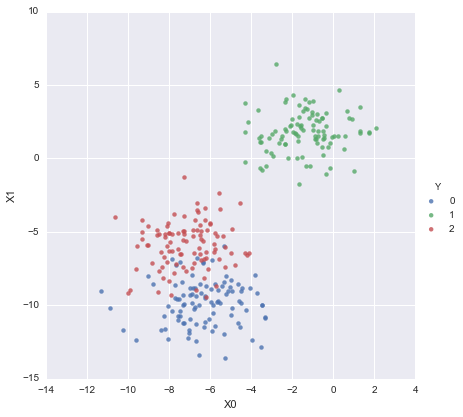

In [268]:
from sklearn.datasets import make_blobs

df = pd.DataFrame(columns=['X0','X1','Y'])
X, Y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.5)
df['X0'],df['X1'],df['Y'] = X[:, 0],X[:, 1],Y

#plt.title("four clusters", fontsize='small')
#plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
sns.lmplot(x='X0',y='X1',data=df,hue='Y',fit_reg=False, size=6)

## K-Means Algorithm

[K-means](https://en.wikipedia.org/wiki/K-means_clustering) is a simple yet surprising effective algorithm for *unsupervised* clustering (grouping) of data. This is **NOT** to be confused with [K-nearest neighbour](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm, which is a *supervised* classification or regression of data.

The concept is as follows:
1. define the "distance" function so that we know how far apart each data point is from one another, for example: a real-life distance on a 2D map.
2. choose how many grouping we want. (say K groups)
3. randomly spawn K points on the map -- we can these points "centroid" for each group. 
4. for each data point, find out the closest "centroid" it belongs to, and label it as such.
5. Once all done, recalculate the "mean" distance of all the points of each group.
6. Move the "centroid" to the new calculated coordinate.
7. repeat from step 4 again, until stabilize -- meaning no point got re-assign to new group.


### Distance function

Since our data is 2-dimension on a cartesian coordinate, we are just going to use euclidean distance. This can be generalized to N dimension as well. The square root doesn't matter so I leave it out.

Caveat: all features (aka input variables) should be standardized so they all have the same scale.

$$ D_{i,K} = (X0_i-C0_K)^2+(X1_i-C1_K)^2$$

### New centroid calculation

We can just average the feature of each datapoint that belongs to the group.

$$ C0_K^{\text{new}} = \frac{1}{N} \sum X0_K $$

And so on and so forth.

### Code starts here

...

..

.

In [272]:
#step 1 - define distance function
def distance(X,C):
    return np.sum((X-C)**2,axis=1)

In [273]:
#step 2 - generate random centroids
K = 3
feature_size = 2
centroid = np.random.uniform(low=-5,high=5,size=(K,feature_size))
print centroid

#mini-step - initialize prev_label
prev_label = np.zeros(shape=(X.shape[0]))
same_flag = False
run_count = 0

[[-2.30443865 -2.28517494]
 [-1.62758782 -1.93609028]
 [ 4.21812237  1.06874431]]


In [274]:
while same_flag == False:
    #step 3 - calculate distance
    # for K centroids, data point no. i-th
    dist = np.zeros(shape=(X.shape[0],K))
    for i in range(0,X.shape[0]):
        dist[i] = distance(X[i],centroid)

    #step 4 - assign labels
    label = np.argmin(dist,axis=1)

    #step 5&6 - recalculate centroids
    for k in range(0,K):
        centroid[k] = np.average(X[(label == k)],axis=0)

    same_flag = np.allclose(label,prev_label)   
    prev_label = label
    run_count += 1

print 'run_count = {}'.format(run_count)

run_count = 11


Test set Accuracy = 13300.00%


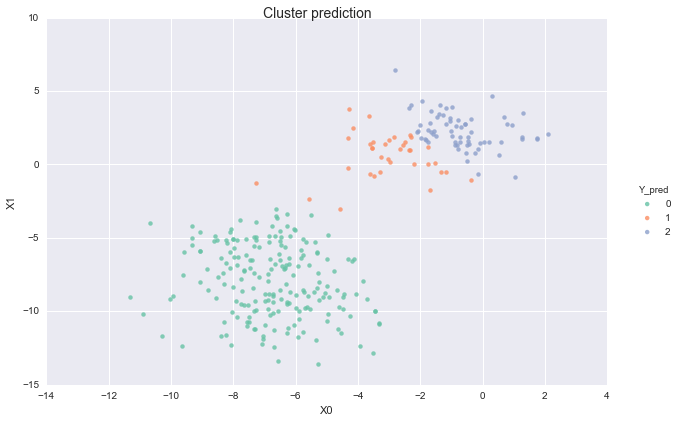

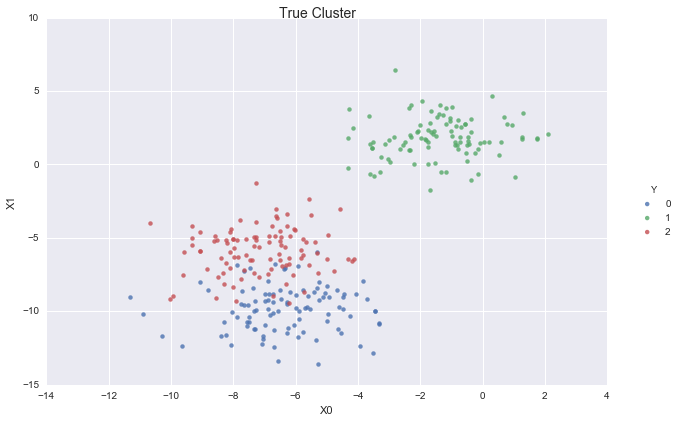

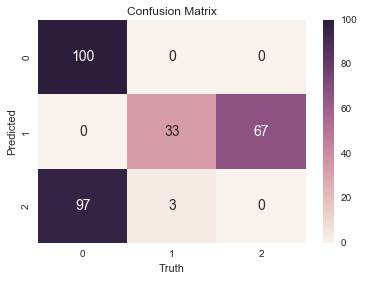

In [275]:
#plot clustering
df['Y_pred'] = label
g = sns.lmplot(x='X0',y='X1',data=df, hue='Y_pred',fit_reg=False, size=6, palette="Set2")
g.fig.suptitle('Cluster prediction')
g.fig.set_size_inches(10,6)
g = sns.lmplot(x='X0',y='X1',data=df, hue='Y',fit_reg=False, size=6)
g.fig.suptitle('True Cluster')
g.fig.set_size_inches(10,6)

#print cm_matrix
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(cm_mat):
    accuracy = np.trace(cm_mat)*100.0
    print 'Test set Accuracy = {:.2f}%'.format(accuracy)
    df_cm = pd.DataFrame(cm_mat)
    plt.figure(figsize = (6,4),dpi=300)
    sns.heatmap(df_cm, cbar=True ,annot=True, fmt=',.0f')
    plt.title('Confusion Matrix')
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    
cm_mat = confusion_matrix(df['Y'],df['Y_pred'])
show_confusion_matrix(cm_mat)